# Training a Linear SVM using Scikit-learn
**Uzair Ahmad**

## 1. Introduction

Support Vector Machines (SVM) aim to find the optimal hyperplane that best separates data into classes. In this tutorial, we'll explore the basics of linear SVM using scikit-learn and visualize how SVM works.
## 2. Setup

Start by importing necessary libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

## 3. Generating Intuitive 2D Example Data

Let's create a simple 2D dataset that's almost linearly separable:

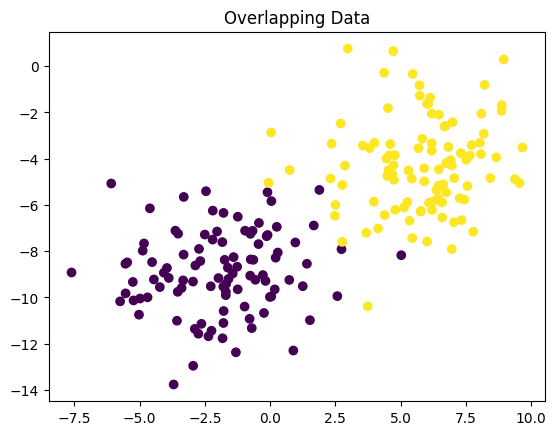

In [ ]:
X, y = datasets.make_blobs(n_samples=200,
                           n_features=2,
                           centers=2,
                           cluster_std=2, random_state=40)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Overlapping Data")
plt.show()

## 4. Training a Hard Margin SVM

A hard margin SVM insists on perfect classification. The decision boundary will likely not look great because the data isn't linearly separable and we're forcing it with a "hard margin".

In [ ]:
clf_hard = SVC(C=float(1e6), kernel='linear')
clf_hard.fit(X, y)


SVC(C=1000000.0, kernel='linear')

Visualize the solution.


Given the hyperplane equation for SVM in a 2-dimensional space:

$ w_1 \times x_1 + w_2 \times x_2 + b = 0 $

Here, $x_1$ and $x_2$ are the coordinates on the 2D plane, $w_1$ and $w_2$ are the coefficients associated with these coordinates, and $b$ is the bias.

If we want to express $x_2$ (which is equivalent to $y$ in the code) in terms of $x_1$ (which is equivalent to $x$ in the code), we can rearrange the equation:

$ x_2 = \frac{-w_1 \times x_1 - b}{w_2} $

Now, replacing the variables with the values from the `clf` (which is our trained SVM model):

- $w_1$  is `clf.coef_[0][0]`
- $w_2$ is `clf.coef_[0][1]`
- $b$ is `clf.intercept_[0]`

So, plugging those in:

$ x_2 = \frac{-\text{clf.coef_}[0][0] \times \text{xx} - \text{clf.intercept_}[0]}{\text{clf.coef_}[0][1]} $

Which is the same as:

$ \text{yy} = \frac{-\text{clf.coef_}[0][0] \times \text{xx} - \text{clf.intercept_}[0]}{\text{clf.coef_}[0][1]} $

This equation gives the decision boundary of the SVM. For every $x_1$ value $x$, we can find the corresponding $x_2$ value $y$ on the decision boundary. When plotted, this gives us the line (in 2D) that separates the two classes.

The margins will be at values +1 and -1 from the decision boundary, but this formula specifically calculates the decision boundary itself.

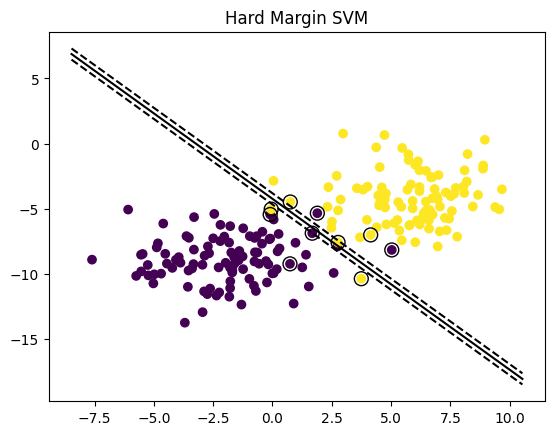

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()

# Decision Boundary
xx = np.linspace(xlim[0], xlim[1])
yy = -(clf_hard.coef_[0][0] * xx + clf_hard.intercept_[0]) / clf_hard.coef_[0][1]
plt.plot(xx, yy, 'k-')

# Margin lines
yy = -(clf_hard.coef_[0][0] * xx + clf_hard.intercept_[0] - 1) / clf_hard.coef_[0][1]
plt.plot(xx, yy, 'k--')
yy = -(clf_hard.coef_[0][0] * xx + clf_hard.intercept_[0] + 1) / clf_hard.coef_[0][1]
plt.plot(xx, yy, 'k--')

plt.scatter(clf_hard.support_vectors_[:, 0], clf_hard.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title("Hard Margin SVM")
plt.show()


**Note 1:**  Misclassification: A "true" hard margin SVM would indeed have no misclassifications, meaning no data points of one class would be on the other side of the decision boundary. However, with scikit-learn's implementation, even with high C values, perfect separation isn't guaranteed if the data isn't perfectly linearly separable. The SVC with a high C value will try its best to achieve this, but if it's impossible due to data overlap, you'll see misclassifications.

**Note 2:** Support Vectors on the Wrong Side: This is more perplexing but can happen due to the nature of the data and how the SVM optimization works. These wrongly placed support vectors will have a slack variable value of $ξi>1ξi​>1$ They influence the decision boundary's position and orientation, and removing or adjusting them would change the boundary.

In [ ]:
from sklearn.metrics import classification_report

# Predictions for hard margin SVM
y_pred_hard = clf_hard.predict(X)

# Classification report for hard margin SVM
print("Classification Report for Hard Margin SVM:")
print(classification_report(y, y_pred_hard))


Classification Report for Hard Margin SVM:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.98      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



## 5. Demonstrating Soft Margin SVM

Soft margin SVM allows some misclassifications, determined by C (penalty parameter). By reducing C, we're allowing some slack, which means the SVM can tolerate misclassifications to achieve a wider margin.

**Note: **The hyperparameter C in the SVM controls the balance between maximizing the margin and minimizing the sum of slack variables.

- A smaller C will prioritize a larger margin but allow more instances to violate the margin or even be misclassified (higher sum of slack variables). This can make the SVM more tolerant of outliers.

- A larger C will prioritize fewer margin violations and misclassifications (trying to minimize the sum of slack variables). This might lead to a smaller margin and the SVM could be more sensitive to outliers.


Here, the decision boundary should look more reasonable because we're allowing some misclassifications for the sake of a more general solution. The points that are within the margin or on the wrong side of the hyperplane are where the slack variables come into play, allowing those violations.

By comparing the decision boundaries of the hard margin SVM and the soft margin SVM on this dataset, the concept of soft margin, hard margin, and slack variables should be clearer.


In [ ]:
clf_soft = SVC(C=1, kernel='linear')
clf_soft.fit(X, y)


SVC(C=1, kernel='linear')

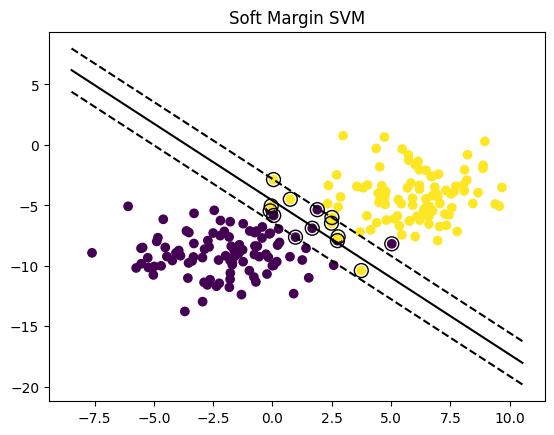

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()

# Decision Boundary
xx = np.linspace(xlim[0], xlim[1])
yy = -(clf_soft.coef_[0][0] * xx + clf_soft.intercept_[0]) / clf_soft.coef_[0][1]
plt.plot(xx, yy, 'k-')

# Margin lines
yy = -(clf_soft.coef_[0][0] * xx + clf_soft.intercept_[0] - 1) / clf_soft.coef_[0][1]
plt.plot(xx, yy, 'k--')
yy = -(clf_soft.coef_[0][0] * xx + clf_soft.intercept_[0] + 1) / clf_soft.coef_[0][1]
plt.plot(xx, yy, 'k--')

plt.scatter(clf_soft.support_vectors_[:, 0], clf_soft.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title("Soft Margin SVM")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
# Predictions for soft margin SVM
y_pred_soft = clf_soft.predict(X)

# Classification report for soft margin SVM
print("\nClassification Report for Soft Margin SVM:")
print(classification_report(y, y_pred_soft))




Classification Report for Soft Margin SVM:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.97      0.98      0.98       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



## 6. Slack Variables & Penalty

**Slack Variables:** These are introduced to handle instances that are hard to classify, allowing SVM to make certain exceptions.

**Penalty Parameter (C):** A lower C encourages a wider margin at the cost of some misclassifications. A higher C puts more emphasis on classifying every instance correctly.

Play around with different values of C to understand its impact. You'll notice that as C decreases, the margin becomes wider, but there might be more misclassifications.